# Test run for segmentation with + and - samples

In [1]:
# import newly developed scripts
import sys
sys.path.append('/Users/nweir/Dropbox/code/csth-imaging')
from csth_analysis import czi_io, find_cells, segment_cells, foci
import numpy as np
import os
from skimage import io, measure
from scipy.ndimage import filters
import matplotlib.pyplot as plt
from scipy import stats
import pickle
from skimage.feature import canny
from pyto_segmenter import PexSegment
from scipy.ndimage.morphology import distance_transform_edt
from skimage.morphology import watershed
import imp
import csth_analysis
%matplotlib inline

/usr/local/lib/python3.6/site-packages/tifffile.py:313: UserWarning: ImportError: No module named '_tifffile'. Loading of some compressed images will be very slow. Tifffile.c can be obtained at http://www.lfd.uci.edu/~gohlke/
  "ImportError: No module named '_tifffile'. "
/usr/local/lib/python3.6/site-packages/czifile.py:130: UserWarning: failed to import the optional _czifile C extension module.
Decoding of JXR and JPEG encoded images will not be available.
Czifile.pyx can be obtained at http://www.lfd.uci.edu/~gohlke/
  "failed to import the optional _czifile C extension module.\n"
/usr/local/lib/python3.6/site-packages/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [4]:
os.chdir('/Users/nweir/Dropbox/chris_imaging/imaging_test/th_sample_czi/')
positive_finder = find_cells.MultiFinder('/Users/nweir/Dropbox/chris_imaging/imaging_test/th_sample_czi/LC3-p62_HEK_dTMEM_No Torin_10Pos_1_AiryscanProcessing.czi',
                                    bg_filename = '/Users/nweir/Dropbox/chris_imaging/imaging_test/th_sample_czi/LC3-p62_HEK_dVPS37A_No Torin_EMPTY_AiryscanProcessing.czi')

In [5]:
positive_splitter = segment_cells.CellSplitter(positive_finder)

In [7]:
positive_splitter.segment_nuclei()

input image has 4 dimensions (multiple imgs)
segmenting image #1 of 10...
raw image imported.
performing gaussian filtering...
Image smoothed.
preprocessing complete.
thresholding...
mode = threshold.
thresholding complete.
filling holes in objects.
generating distance map...
distance map complete.
smoothing distance map...
distance map smoothed.
identifying maxima...
maxima identified.
watershedding...
watershedding complete.
creating PexSegmentObj...
passing segmented objs and seeds to Nuclei instance...

segmenting image #2 of 10...
raw image imported.
performing gaussian filtering...
Image smoothed.
preprocessing complete.
thresholding...
mode = threshold.
thresholding complete.
filling holes in objects.
generating distance map...
distance map complete.
smoothing distance map...
distance map smoothed.
identifying maxima...
maxima identified.
watershedding...
watershedding complete.
creating PexSegmentObj...
passing segmented objs and seeds to Nuclei instance...

segmenting image #3

In [12]:
os.system('say "Done"')

0

In [8]:
positive_splitter.segment_cells(488)
os.system('say "Done"')

checking that nuclei have already been segmented...
generating cell masks...
log-transforming arrays...
applying gaussian filter...
computing p-value transformation...
 computing p-val xform for slice 1 out of 10
 computing p-val xform for slice 2 out of 10
 computing p-val xform for slice 3 out of 10
 computing p-val xform for slice 4 out of 10
 computing p-val xform for slice 5 out of 10
 computing p-val xform for slice 6 out of 10
 computing p-val xform for slice 7 out of 10
 computing p-val xform for slice 8 out of 10
 computing p-val xform for slice 9 out of 10
 computing p-val xform for slice 10 out of 10
converting to binary...

generating cell masks...

generating mask #1
labeling contiguous objects...
eliminating objects w/volume < 100,000 px...
pruning labels...
appending outputs...
mask #1 complete.

generating mask #2
labeling contiguous objects...
eliminating objects w/volume < 100,000 px...
pruning labels...
appending outputs...
mask #2 complete.

generating mask #3
label

0

In [15]:
positive_splitter.filenames

AttributeError: 'CellSplitter' object has no attribute 'filenames'

In [9]:
## write
os.chdir('/Users/nweir/Dropbox/chris_imaging/imaging_test/th_sample_czi/')
file_path = "positive_splitter.pickle"
max_bytes = 2**31 - 1
 
bytes_out = pickle.dumps(positive_splitter)
with open(file_path, 'wb') as f_out:
    for idx in range(0, len(bytes_out), max_bytes):
        f_out.write(bytes_out[idx:idx+max_bytes])


In [ ]:
## write
os.chdir('/Users/nweir/Dropbox/chris_imaging/imaging_test/th_sample_czi/')
file_path = "negative_splitter.pickle"
max_bytes = 2**31 - 1
 
bytes_out = pickle.dumps(negative_splitter)
with open(file_path, 'wb') as f_out:
    for idx in range(0, len(bytes_out), max_bytes):
        f_out.write(bytes_out[idx:idx+max_bytes])


In [ ]:
## read
bytes_in = bytearray(0)
input_size = os.path.getsize(file_path)
with open(file_path, 'rb') as f_in:
    for _ in range(0, input_size, max_bytes):
        bytes_in += f_in.read(max_bytes)
data2 = pickle.loads(bytes_in)

assert(data == data2)

# Repeating test run to troubleshoot LC3/WIPI analysis

In [7]:
im_path = '/Users/nweir/Dropbox/chris_imaging/imaging_test/th_sample_czi/LC3-WIPI_HEK_wt_Torin_position15_AiryscanProcessing.czi'
control_path = '/Users/nweir/Dropbox/chris_imaging/imaging_test/th_sample_czi/LC3-WIPI_HEK_dSQSTM1_NoTreat_ClumpandEmptyandSingles_Airyscan Processing.czi'
finder = find_cells.MultiFinder(im_path)
bg_czi = czi_io.load_multi_czi(control_path)
bg_czi_im = np.expand_dims(bg_czi[0][4, :, :, :, :], axis=0)
finder.bg_im = bg_czi_im
finder.bg_channels = bg_czi[1]

/Users/nweir/Dropbox/code/csth-imaging/csth_analysis/find_cells.py:58: UserWarning: No background image provided during initialization.
  warn('No background image provided during initialization.')


In [8]:
finder.cell_im.shape

[488, 561, 405]

In [5]:
splitter = segment_cells.CellSplitter(finder)
print('CellSplitter instance created.')
splitter.segment_nuclei(verbose=True)  # segment nuclei
print('Nuclei segmented.')
splitter.segment_cells(488, verbose=True)  # segment cells using the 488 wl
print('Cells segmented.')

CellSplitter instance created.
input image has 4 dimensions (multiple imgs)
segmenting image #1 of 1...
raw image imported.
performing gaussian filtering...
Image smoothed.
preprocessing complete.
thresholding...
mode = threshold.
thresholding complete.
filling holes in objects.
generating distance map...
distance map complete.
smoothing distance map...
distance map smoothed.
identifying maxima...
maxima identified.
watershedding...
watershedding complete.
creating PexSegmentObj...
passing segmented objs and seeds to Nuclei instance...

removing small perinuclear foci...
2 raw segmented DAPI foci
0 foci volume < 1000 px, removing...
removing nuclei_centers corresponding to perinuclear DAPI foci...
Nuclei segmented.
checking that nuclei have already been segmented...
generating cell masks...
log-transforming arrays...
applying gaussian filter...
computing p-value transformation...
 computing p-val xform for image 1 out of 1
converting to binary...

generating cell masks...

generating m

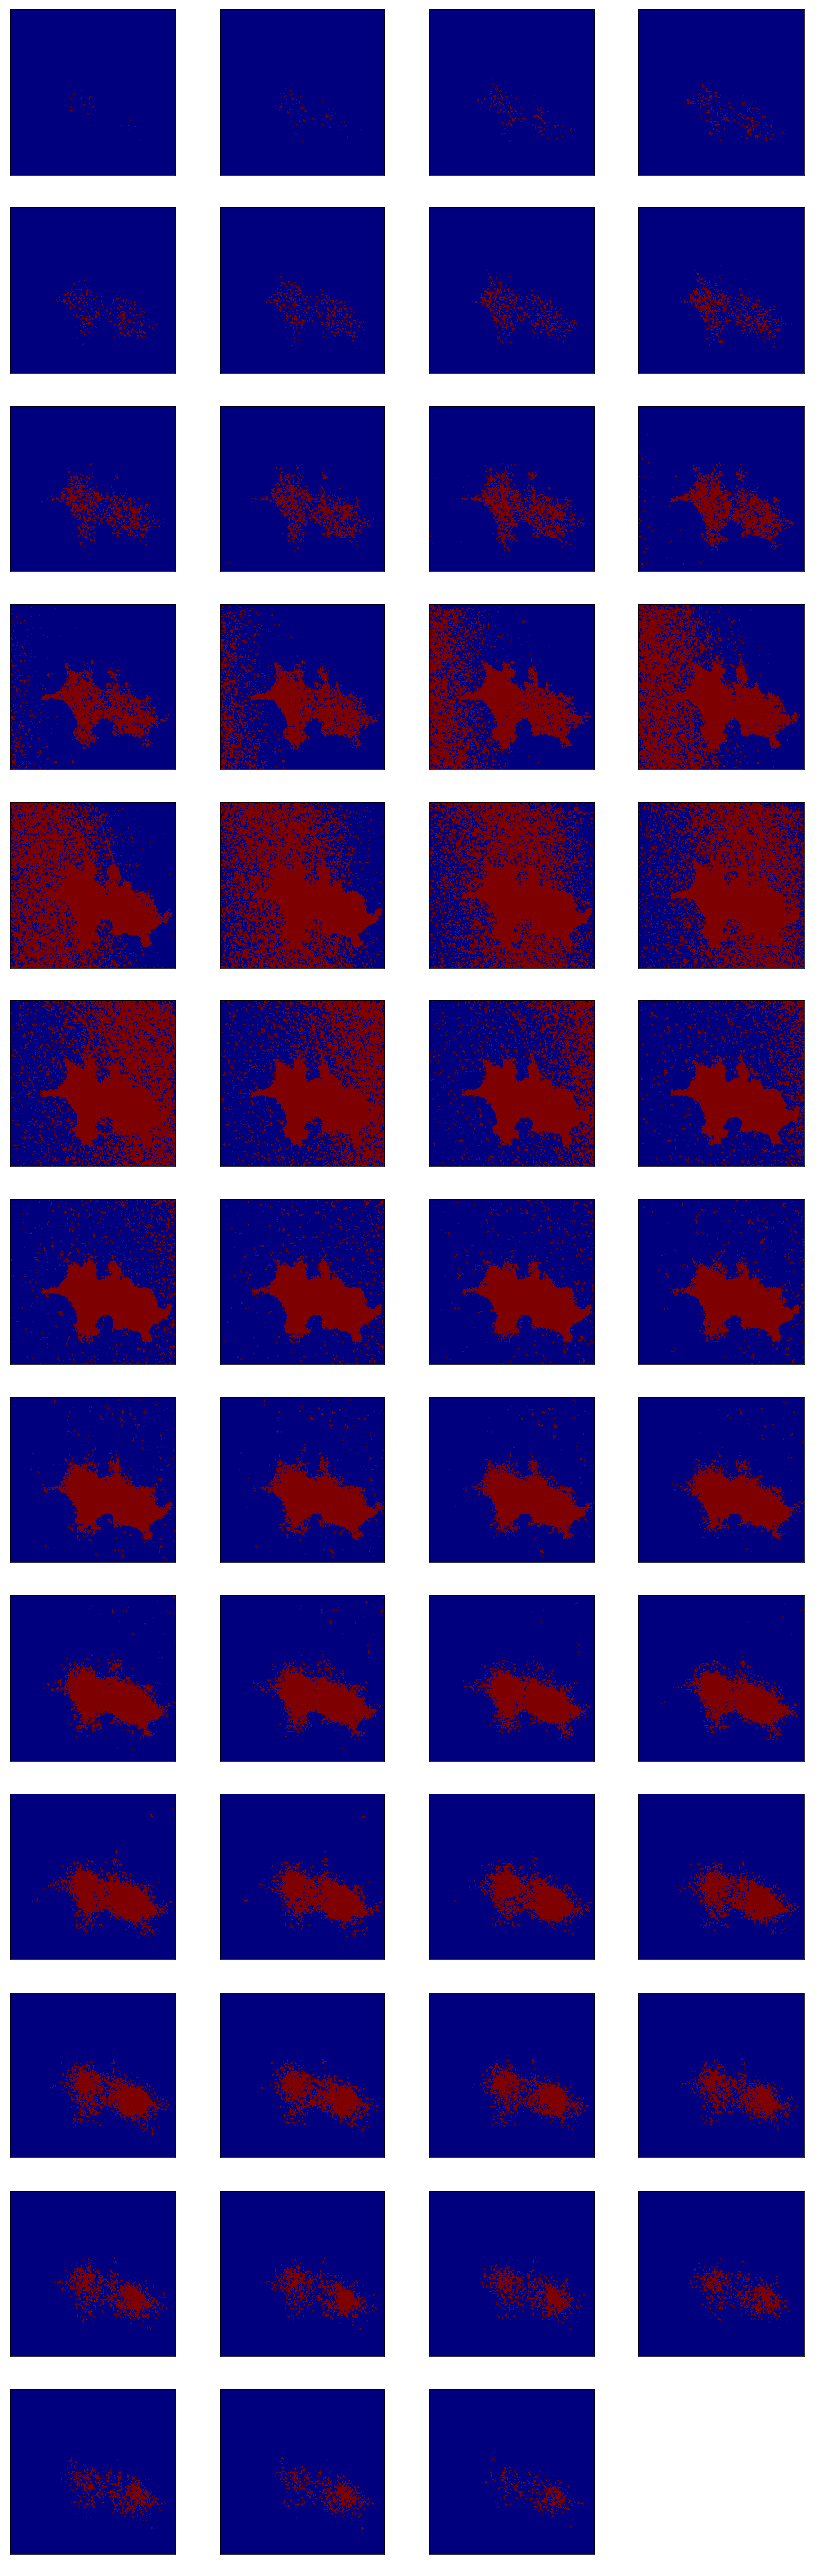

In [7]:
PexSegment.PexSegmentObj.plot_stack(splitter.cell_masks[0])

It looks like the negative WIPI control is too dim and therefore results in over-segmentation of cells. Below I test to see if a small non-image-containing subregion of a field can work better.

In [2]:
bg_tif_im = io.imread('/Users/nweir/Dropbox/chris_imaging/imaging_test/WIPI_empty_control.tif')


In [6]:
finder.bg_channels

NameError: name 'finder' is not defined

In [4]:
bg_tif_im = np.moveaxis(bg_tif_im, -1, 0)

In [5]:
bg_tif_im.shape

(3, 51, 368, 368)

In [12]:
im_path = '/Users/nweir/Dropbox/chris_imaging/imaging_test/th_sample_czi/LC3-WIPI_HEK_wt_Torin_position15_AiryscanProcessing.czi'
finder = find_cells.MultiFinder(im_path)
finder.bg_im = np.expand_dims(bg_tif_im, axis=0)
finder.bg_channels = [488, 561, 405]

/Users/nweir/Dropbox/code/csth-imaging/csth_analysis/find_cells.py:58: UserWarning: No background image provided during initialization.
  warn('No background image provided during initialization.')


In [13]:
splitter = segment_cells.CellSplitter(finder)
print('CellSplitter instance created.')
splitter.segment_nuclei(verbose=True)  # segment nuclei
print('Nuclei segmented.')
splitter.segment_cells(488, verbose=True)  # segment cells using the 488 wl
print('Cells segmented.')

CellSplitter instance created.
input image has 4 dimensions (multiple imgs)
segmenting image #1 of 1...
raw image imported.
performing gaussian filtering...
Image smoothed.
preprocessing complete.
thresholding...
mode = threshold.
thresholding complete.
filling holes in objects.
generating distance map...
distance map complete.
smoothing distance map...
distance map smoothed.
identifying maxima...
maxima identified.
watershedding...
watershedding complete.
creating PexSegmentObj...
passing segmented objs and seeds to Nuclei instance...

removing small perinuclear foci...
2 raw segmented DAPI foci
0 foci volume < 1000 px, removing...
removing nuclei_centers corresponding to perinuclear DAPI foci...
Nuclei segmented.
checking that nuclei have already been segmented...
generating cell masks...
log-transforming arrays...
applying gaussian filter...
computing p-value transformation...
 computing p-val xform for image 1 out of 1
converting to binary...

generating cell masks...

generating m

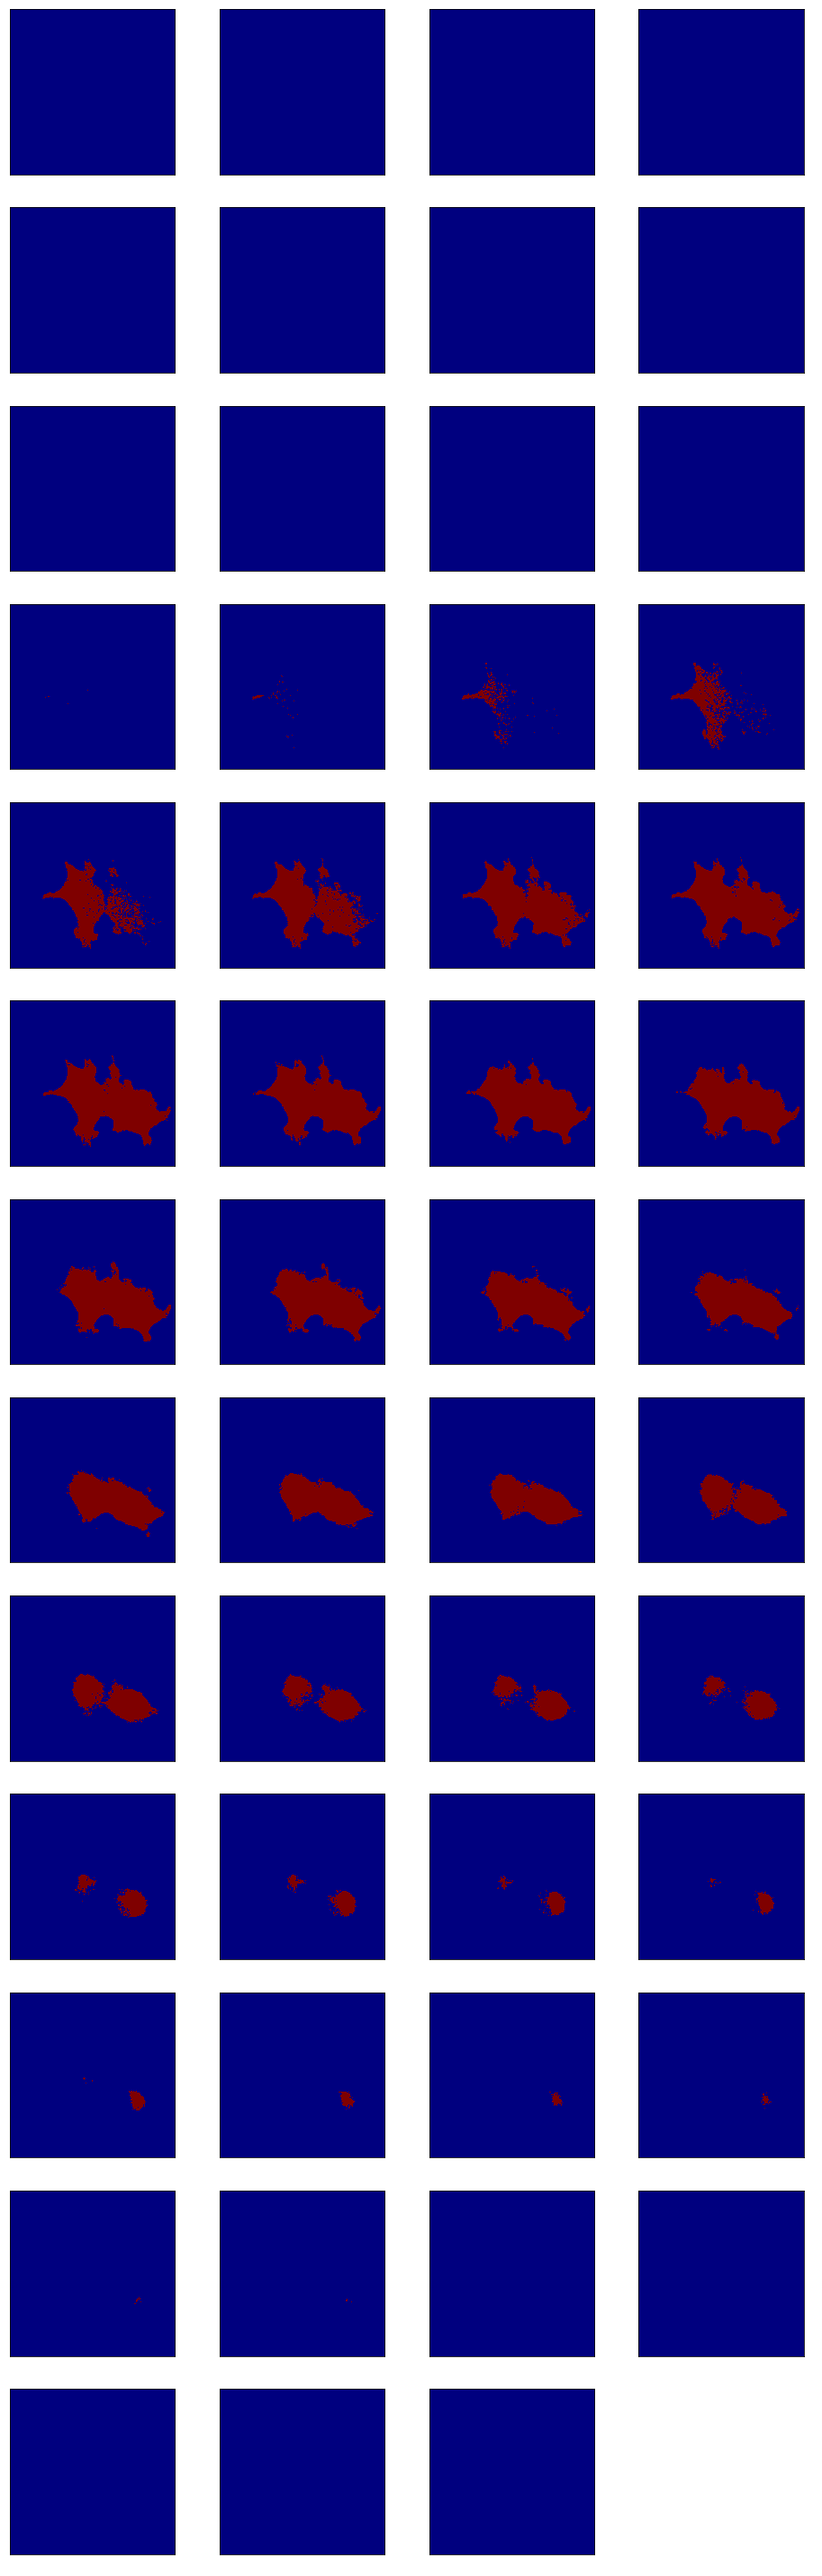

In [14]:
PexSegment.PexSegmentObj.plot_stack(splitter.cell_masks[0])